In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

credit_info = pd.read_csv("CC.csv")

credit_info.isnull().sum()

/home/srichakradhar/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# fill null values with mean
credit_info = credit_info.fillna(credit_info.mean())
credit_info.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

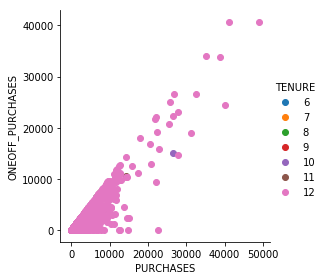

In [4]:
sns.FacetGrid(credit_info, hue="TENURE", height=4).map(plt.scatter, "PURCHASES", "ONEOFF_PURCHASES").add_legend()
plt.show()

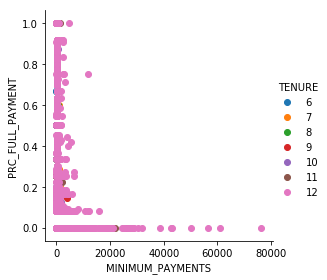

In [5]:
sns.FacetGrid(credit_info, hue="TENURE", height=4).map(plt.scatter, "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT").add_legend()
plt.show()

In [6]:
print("Original Data size:", credit_info.shape)
x = credit_info.iloc[:, 1:18]
y = credit_info.iloc[:, -1]

print("Inputs, Targets")
print(x.shape, y.shape)

Original Data size: (8950, 18)
Inputs, Targets
(8950, 17) (8950,)


In [7]:
# see how many samples we have of each Tenure
print(credit_info["TENURE"].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


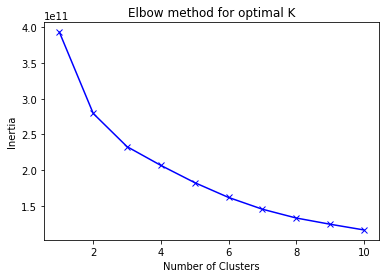

In [8]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_list, 'bx-')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns=x.columns)

nclusters = 4  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.398138272259527


In [13]:
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.19760744927206977


0.05333278741780401


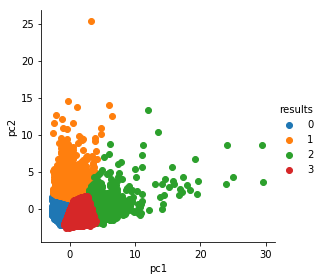

In [15]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled_array)
df2 = pd.DataFrame(data=x_pca, columns=["pc1", "pc2"])

km.fit(df2)
df2['results'] = km.predict(df2)
score = metrics.silhouette_score(x, df2['results'])
print(score)
sns.FacetGrid(df2, hue="results", height=4).map(plt.scatter, "pc1", "pc2").add_legend()
plt.show()